# Two-Level: Gaussian Pulse 0.8π 

In [1]:
import numpy as np

In [2]:
FNAME = "mb-solve-two-gaussian-0.8pi"

In [3]:
fwhm = 1.0 # [τ]
n = 0.8 # For a pulse area of nπ    
ampl = n*np.sqrt(4.*np.pi*np.log(2)/fwhm**2)/(2*np.pi)  # [2π Γ] nπ pulse
print(ampl)

0.3757749114798606


In [4]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0,
        "rabi_freq_t_args": {
          "ampl": %f,
          "centre": 0.0,
          "fwhm": %f
        },
        "rabi_freq_t_func": "gaussian"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.5,
  "z_max": 1.5,
  "z_steps": 200,
  "z_steps_inner": 1,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [
    10.0
  ],
  "velocity_classes": {},
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/%s"
}
"""%(ampl, fwhm, FNAME)

In [5]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

In [6]:
print('The input pulse area is {0}'.format(np.trapz(mb_solve_00.Omegas_zt[0,0,:].real, 
                                                    mb_solve_00.tlist)/np.pi))

The input pulse area is 0.7999990916928281


## Solve the Problem

In [7]:
time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 4.29 ms, sys: 6.92 ms, total: 11.2 ms
Wall time: 14.3 ms


## Plot Output

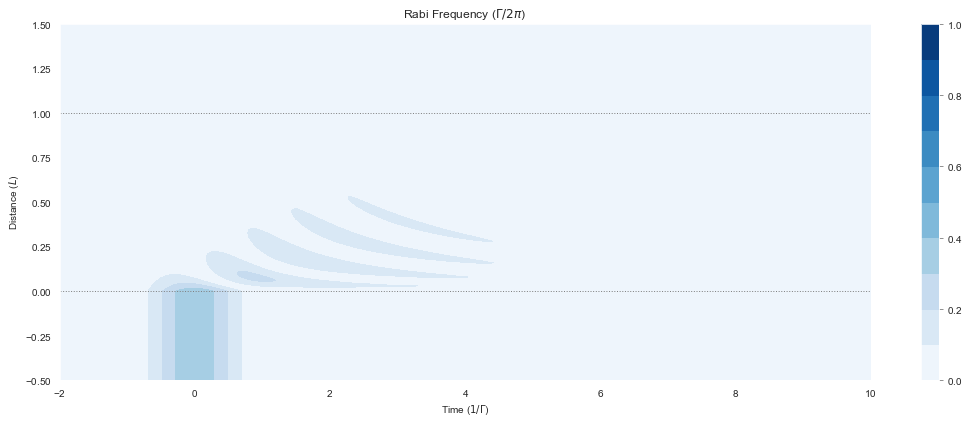

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/'+FNAME+'.png')

## Movie

In [9]:
C = 0.1 # speed of light
Y_MIN = 0.0 # Y-axis min
Y_MAX = 4.0 # y-axis max
ZOOM = 2 # level of linear interpolation
FPS = 30 # frames per second
ATOMS_ALPHA = 0.2 # Atom indicator transparency

In [10]:
FNAME_IMG = "images/"+FNAME
FNAME_JSON = FNAME_IMG + '.json'
with open(FNAME_JSON, "w") as f:
    f.write(mb_solve_json)

In [11]:
!make-mp4-fixed-frame.py -f $FNAME_JSON -c $C --fps $FPS --y-min $Y_MIN --y-max $Y_MAX \
    --zoom $ZOOM --atoms-alpha $ATOMS_ALPHA #--peak-line --c-line

Namespace(atoms_alpha='0.2', c_line=False, file='images/mb-solve-two-gaussian-0.8pi.json', fps='30', peak_line=False, save_path='./', speed_of_light='0.1', y_max='4.0', y_min='0.0', zoom='2')
Loaded tuple object.
Saving MP4
./images/mb-solve-two-gaussian-0.8pi.mp4
Figure(1200x400)


In [12]:
FNAME_MP4 = FNAME_IMG + '.mp4'
!make-gif-ffmpeg.sh -f $FNAME_MP4 --in-fps $FPS

Converting images/mb-solve-two-gaussian-0.8pi.mp4 to gif format
Input Scale: 900
Input FPS: 30
Output Scale: 900
Output FPS: 30
/Users/tommy/.miniconda3/envs/mb-0.4.0/bin/make-gif-ffmpeg.sh: line 59: Y: command not found
ffmpeg version 3.2.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.42.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.2.4 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --disable-lzma --enable-vda
  libavutil      55. 34.101 / 55. 34.101
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.101 / 57. 56.101
  libavdevice    57.  1.100 / 57.  1.100
  libavfilter     6. 65.100 /  6. 65.100
  libavresample   3.  1.  0 /  3.  1.  0
  libswscale      4.  2.100 /  4.  2.100
  libswresample   2.  3.100 /  2.  3.100
  libpostproc    54

In [13]:
from IPython.display import Image
Image(url=FNAME_MP4+'.gif', format='gif')